# Ejemplo 9.4

## Problema

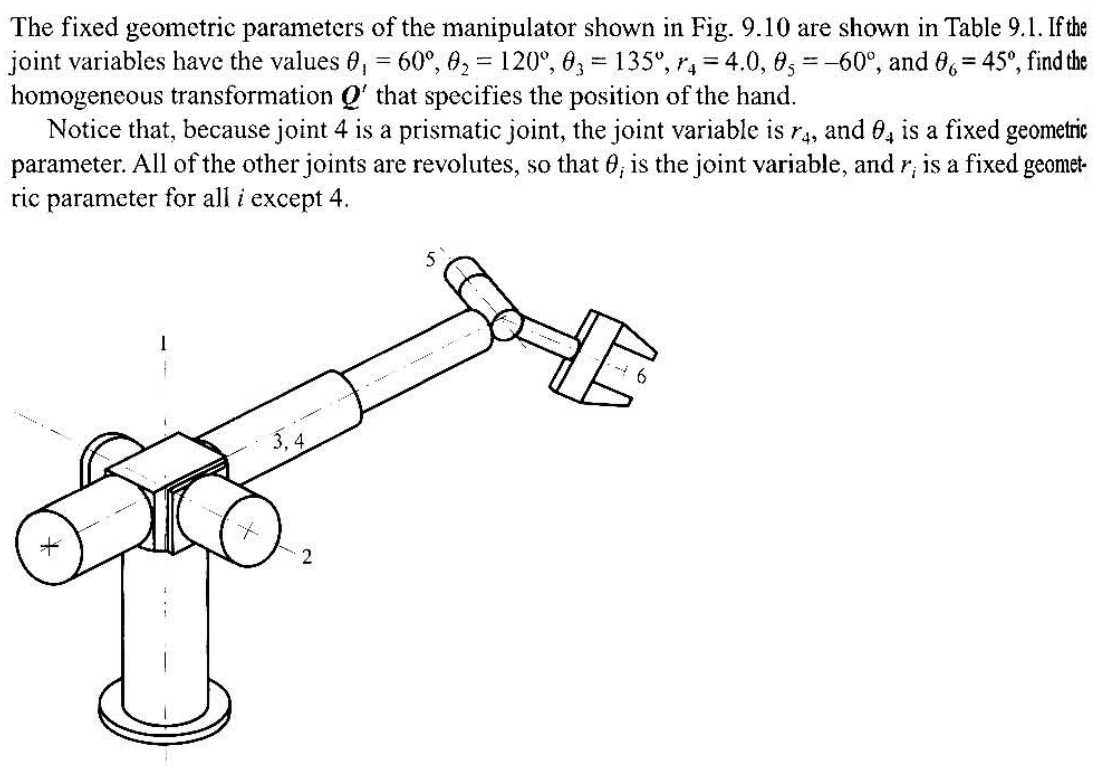

## Solución planteada por el libro

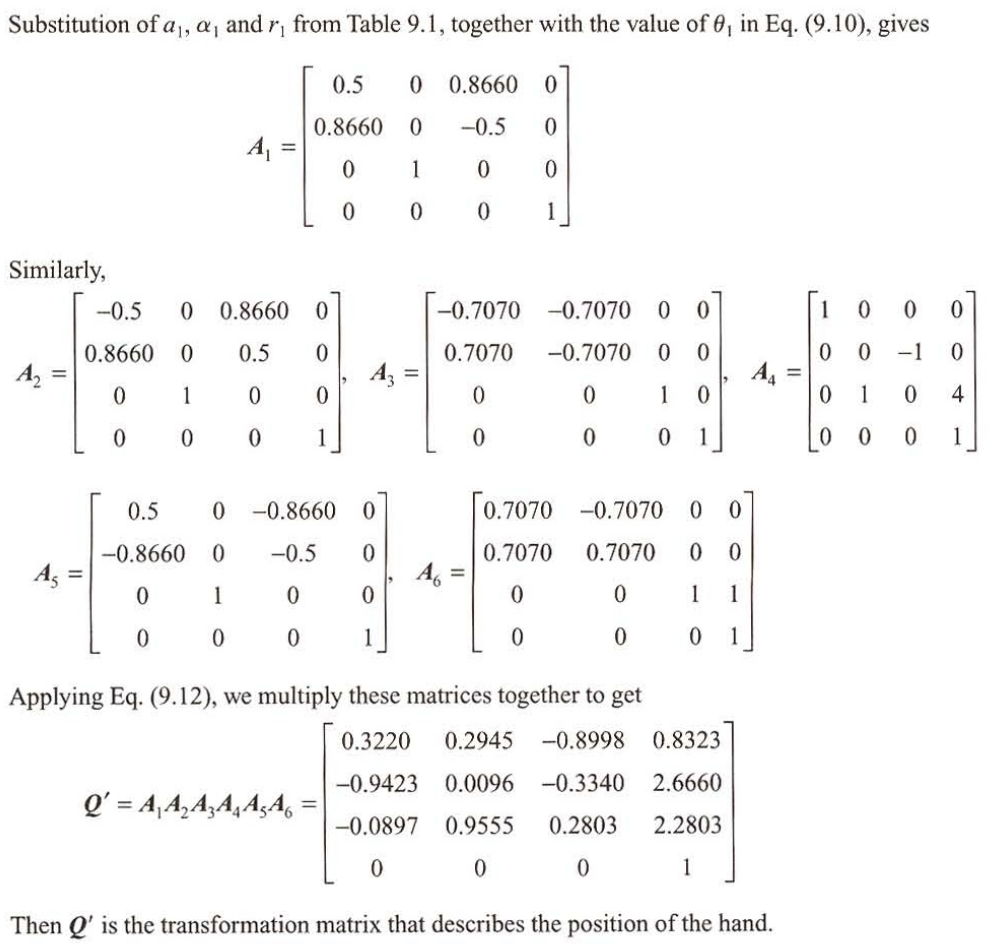

## Solución implementada en Python

In [5]:
import sympy as sp
import numpy as np
from enum import Enum
import sympy.core.mul as mul
from functools import partial


Number = float | int
Symbol = sp.Symbol | mul.Mul


class AngleMode(Enum):
    DEG = 1
    RAD = 2


class DHParameters:
    list_a: list[Number | Symbol]
    list_r: list[Number | Symbol]
    list_alpha: list[Number | Symbol]
    list_theta: list[Number | Symbol]
    angle_mode: AngleMode

    def __init__(self, angle_mode: AngleMode):
        self.angle_mode = angle_mode
        self.list_a = []
        self.list_r = []
        self.list_alpha = []
        self.list_theta = []

    def add_parameters(
        self,
        a: Number | Symbol,
        r: Number | Symbol,
        alpha: Number | Symbol,
        theta: Number | Symbol,
    ) -> None:
        self.list_a.append(a)
        self.list_r.append(r)
        self.list_alpha.append(alpha)
        self.list_theta.append(theta)

    def cos(self, x: Number | Symbol) -> Number | Symbol:
        if isinstance(x, Number):
            return np.cos(x)
        else:
            return sp.cos(x)  # type: ignore

    def sin(self, x: Number | Symbol) -> Number | Symbol:
        if isinstance(x, Number):
            return np.sin(x)
        else:
            return sp.sin(x)  # type: ignore

    def get_transformation_matrices(self) -> list[sp.Matrix]:
        transformation_matrices: list[sp.Matrix] = []

        for a, r, alpha, theta in zip(self.list_a, self.list_r, self.list_alpha, self.list_theta):
            if self.angle_mode == AngleMode.DEG:
                if isinstance(alpha, Number):
                    alpha = np.deg2rad(alpha)
                if isinstance(theta, Number):
                    theta = np.deg2rad(theta)

            transformation_matrices.append(
                sp.Matrix(
                    [
                        [
                            self.cos(theta),
                            -self.sin(theta) * self.cos(alpha),
                            self.sin(theta) * self.sin(alpha),
                            a * self.cos(theta),
                        ],
                        [
                            self.sin(theta),
                            self.cos(theta) * self.cos(alpha),
                            -self.cos(theta) * self.sin(alpha),
                            a * self.sin(theta),
                        ],
                        [0, self.sin(alpha), self.cos(alpha), r],
                        [0, 0, 0, 1],
                    ]
                )
            )

        return transformation_matrices

    def get_final_transformation_matrix(self) -> sp.Matrix:
        final_transformation_matrix = sp.eye(4)

        for matrix in self.get_transformation_matrices():
            final_transformation_matrix = final_transformation_matrix @ matrix

        return final_transformation_matrix

In [6]:
def main() -> None:
    dh_parameters = DHParameters(AngleMode.DEG)

    dh_parameters.add_parameters(0, 0, 90, 60)
    dh_parameters.add_parameters(0, 0, 90, 120)
    dh_parameters.add_parameters(0, 0, 0, 135)
    dh_parameters.add_parameters(0, 4, 90, 0)
    dh_parameters.add_parameters(0, 0, 90, -60)
    dh_parameters.add_parameters(0, 1, 0, 45)

    transformation_matrices = dh_parameters.get_transformation_matrices()

    round_matrix = partial(round, ndigits=4)

    for i, matrix in enumerate(transformation_matrices):
        print(f"A{ i+ 1 }")
        sp.pprint(matrix.applyfunc(round_matrix))

    print("Q'")
    q = dh_parameters.get_final_transformation_matrix().applyfunc(round_matrix)
    sp.pprint(q)


if __name__ == "__main__":
    main()

A1
⎡ 0.5    0   0.866  0⎤
⎢                    ⎥
⎢0.866   0   -0.5   0⎥
⎢                    ⎥
⎢  0    1.0    0    0⎥
⎢                    ⎥
⎣  0     0     0    1⎦
A2
⎡-0.5    0   0.866  0⎤
⎢                    ⎥
⎢0.866   0    0.5   0⎥
⎢                    ⎥
⎢  0    1.0    0    0⎥
⎢                    ⎥
⎣  0     0     0    1⎦
A3
⎡-0.7071  -0.7071   0   0⎤
⎢                        ⎥
⎢0.7071   -0.7071   0   0⎥
⎢                        ⎥
⎢   0        0     1.0  0⎥
⎢                        ⎥
⎣   0        0      0   1⎦
A4
⎡1.0   0    0    0⎤
⎢                 ⎥
⎢ 0    0   -1.0  0⎥
⎢                 ⎥
⎢ 0   1.0   0    4⎥
⎢                 ⎥
⎣ 0    0    0    1⎦
A5
⎡ 0.5     0   -0.866  0⎤
⎢                      ⎥
⎢-0.866   0    -0.5   0⎥
⎢                      ⎥
⎢  0     1.0    0     0⎥
⎢                      ⎥
⎣  0      0     0     1⎦
A6
⎡0.7071  -0.7071   0   0⎤
⎢                       ⎥
⎢0.7071  0.7071    0   0⎥
⎢                       ⎥
⎢  0        0     1.0  1⎥
⎢                       ⎥
